In [8]:
# Use nbodykit-env

def read_quijote(filepath, cosm, snapnum, axis, space):
    """
    Returns array with Halo positions in Mpc/h
    """
    #import numpy as np
    import readgadget
    import readfof
    import redshift_space_library as RSL

    #-----------
    # Read data from Quijote
    #-----------

    # get the name of the corresponding snapshot
    snapshot = '/home/federico/mnts/clemente/Proyectos/VPF_Quijote/data/quijote/Snapshots/%s/0/snapdir_%03d/snap_%03d'%(cosm,snapnum,snapnum)
    
    # read the redshift, boxsize, cosmology...etc in the header
    header   = readgadget.header(snapshot)
    BoxSize  = header.boxsize/1e3  #Mpc/h
    #Nall     = header.nall         #Total number of particles
    #Masses   = header.massarr*1e10 #Masses of the particles in Msun/h
    Omega_m  = header.omega_m      #value of Omega_m
    Omega_l  = header.omega_l      #value of Omega_l
    h        = header.hubble       #value of h
    redshift = header.redshift     #redshift of the snapshot
    Hubble   = 100.0*np.sqrt(Omega_m*(1.0+redshift)**3+Omega_l) #Value of H(z) in km/s/(Mpc/h)

    print(f'BoxSize = {BoxSize} Mpc/h')
    print(f'Omega_m = {Omega_m}')
    print(f'h = {h}')
    print(f'redshift = {redshift:.1f}')


    FoF = readfof.FoF_catalog(filepath, snapnum, long_ids=False,
                            swap=False, SFR=False, read_IDs=False)
    pos_h  = FoF.GroupPos/1e3            #Halo positions in Mpc/h
    vel_h  = FoF.GroupVel*(1.0+redshift) #Halo peculiar velocities in km/s

    if space == 'zspace':
    	RSL.pos_redshift_space(pos_h, vel_h, BoxSize, Hubble, redshift, axis)

    return pos_h, vel_h, BoxSize  #Halo positions in Mpc/h

import numpy as np
from halotools.mock_observables import s_mu_tpcf
from halotools.mock_observables import tpcf_multipole

dir = '/home/federico/mnts/clemente/Proyectos/VPF_Quijote/data/quijote/Halos/FoF/fiducial/sim1/1/'
cosm = 'fiducial'
snapnum = 4
axis = 0
space = 'zspace'

pos, vel, boxsize = read_quijote(dir,cosm,snapnum,axis,space)

BoxSize = 1000.0 Mpc/h
Omega_m = 0.3175
h = 0.6711
redshift = 0.0


In [9]:
s_bins  = np.linspace(10, 150, 31)
mu_bins = np.linspace(0, 1, 31)
xi_s_mu = s_mu_tpcf(pos, s_bins, mu_bins, period=boxsize)

xi_0 = tpcf_multipole(xi_s_mu, mu_bins, order=0)
xi_2 = tpcf_multipole(xi_s_mu, mu_bins, order=2)
xi_4 = tpcf_multipole(xi_s_mu, mu_bins, order=4)

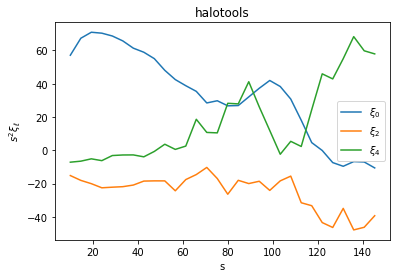

In [10]:
import matplotlib.pyplot as plt
nr = s_bins[:-1]

plt.plot(nr,(nr**2)*(xi_0),label=r'$\xi_0$')
plt.plot(nr,(nr**2)*(-xi_2),label=r'$\xi_2$')
plt.plot(nr,(nr**2)*(-xi_4),label=r'$\xi_4$')
plt.title('halotools')
plt.xlabel('s')
plt.ylabel(r'$s^2\xi_{\ell}$')
plt.legend()